<a href="https://colab.research.google.com/github/salvamc10/Practica-IC/blob/main/Pr%C3%A1ctica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctica 1

Miembros del grupo de prácticas:

*   Salvador Monreal Campos
*   Alfredo Alberto Sinclair Daliz
*   Eduardo Enrique Concepción Valdés



# Imports

In [ ]:
%%time

# Importamos las librerías que vamos a necesitar
import sys
import os
import pathlib
import math
import numpy as np; print(f'Numpy version: {np.__version__}')
import pandas as pd; print(f'Pandas version: {pd.__version__}')
import matplotlib as mpl; print(f'MatPlotLib version: {mpl.__version__}')
import seaborn as sns
import sklearn as sk; print(f'ScikitLearn version: {sk.__version__}')
import tensorflow as tf; print(f'TensorFlow version: {tf.__version__}')
import tensorflow.python.keras as tfk;
import google.colab as gc; print(f'Google Colab version: {gc.__version__}')

# Importamos las funciones necesarias de cada librería
from pathlib import Path
from math import ceil
from numpy import abs, logical_and, nan
from pandas import read_csv, DataFrame, get_dummies
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from scipy.stats import chi2_contingency

# Configuraciones, llamamos a nuestro Google Drive para cargar la carpeta de nuestro dataset
drive.mount('/content/gdrive', force_remount=True)
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Ingeniería del Conocimiento/')

print()

Numpy version: 1.25.2
Pandas version: 2.0.3
MatPlotLib version: 3.7.1
ScikitLearn version: 1.2.2
TensorFlow version: 2.15.0
Google Colab version: 0.0.1a2
Mounted at /content/gdrive

CPU times: user 167 ms, sys: 29.6 ms, total: 196 ms
Wall time: 3.35 s


# Cargamos el dataset

In [ ]:
%%time

# Leemos nuestro dataset
dataset = read_csv('student-mat.csv', sep=';', decimal='.')

# Inprimimos la información del dataset
print(dataset.info())

print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Preprocesamiento de los datos

In [ ]:
%%time

# Convertir variables object a category
categorical_variables = dataset.select_dtypes(include=['object']).columns
dataset[categorical_variables] = dataset[categorical_variables].astype('category')

# Convertir variables int a float
numeric_variables = dataset.select_dtypes(include=['int64']).columns
dataset[numeric_variables] = dataset[numeric_variables].astype('float64')

# Imprimir información del DataFrame
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    float64 
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    float64 
 7   Fedu        395 non-null    float64 
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    float64 
 13  studytime   395 non-null    float64 
 14  failures    395 non-null    float64 
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

# Exploratory Data Analysis (EDA)

## Variables category

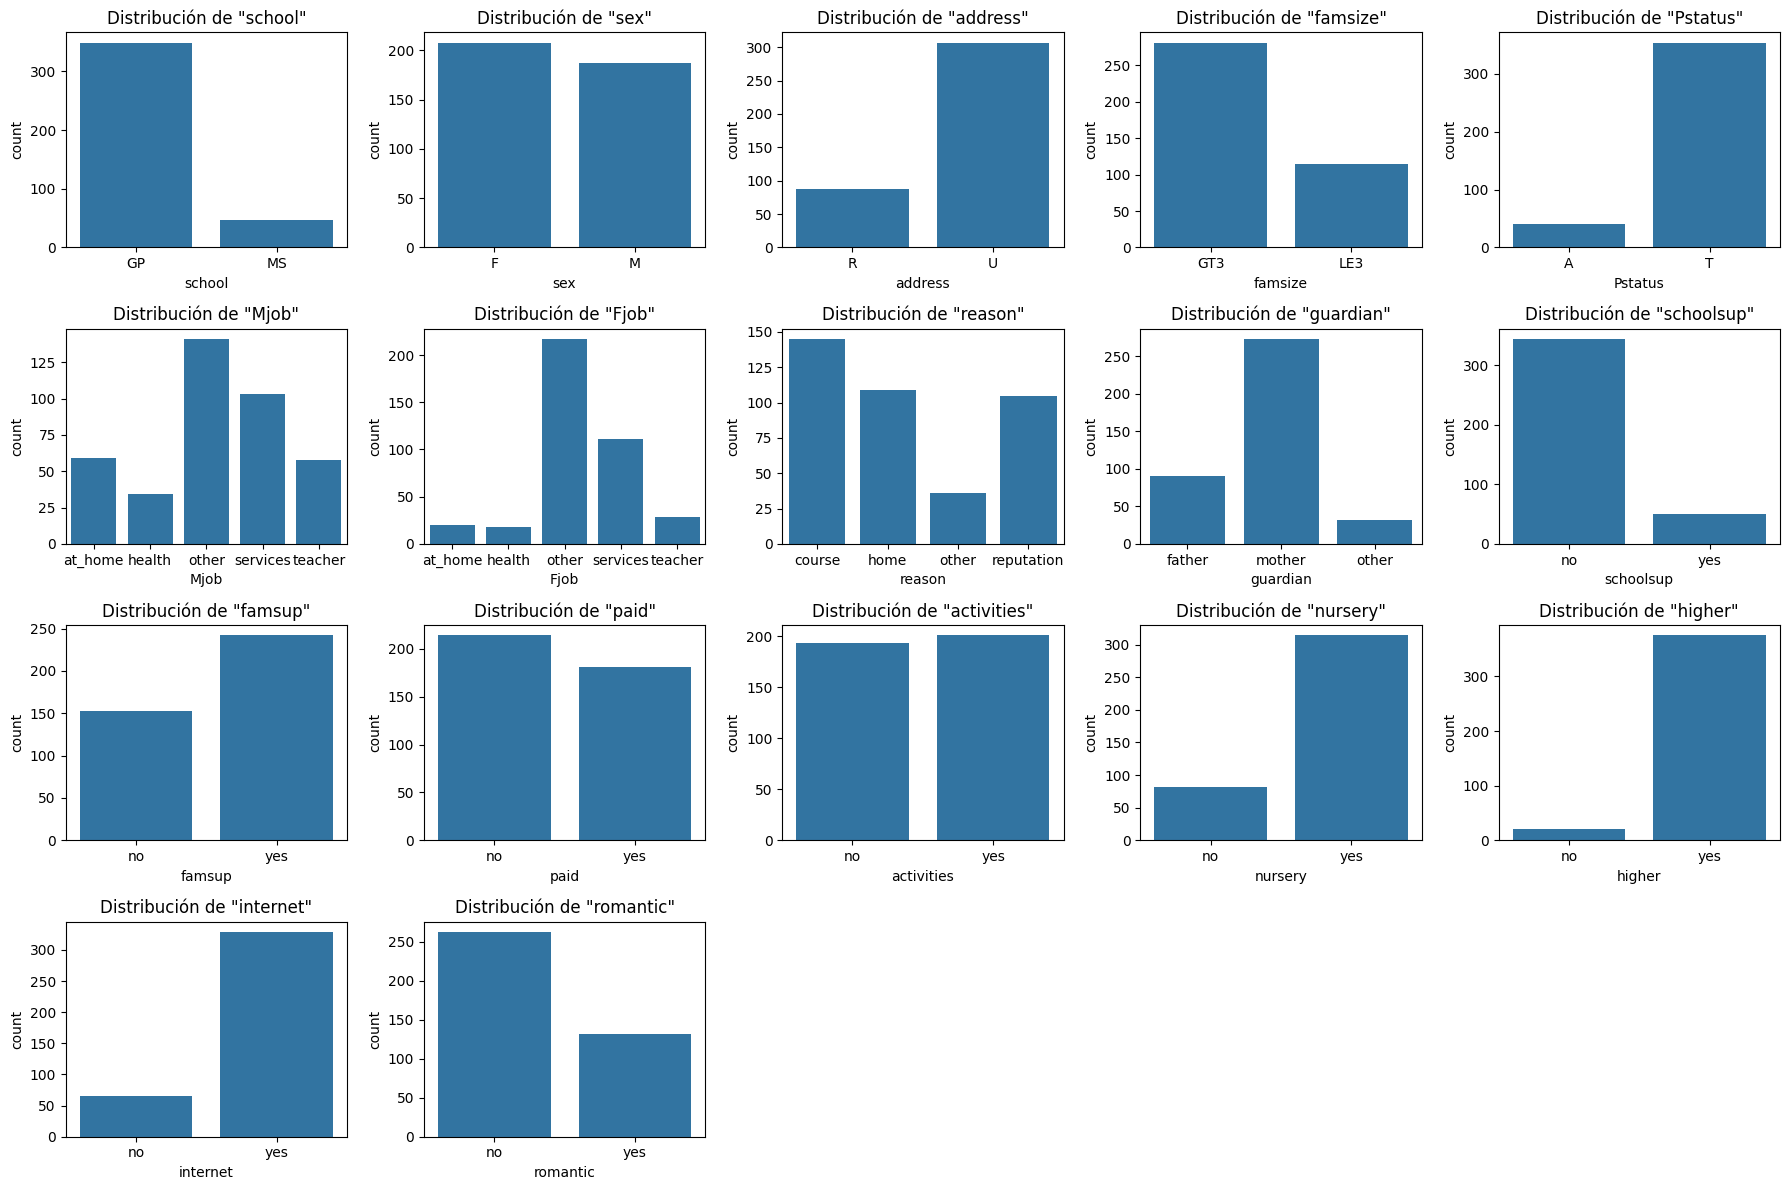

CPU times: user 3.18 s, sys: 187 ms, total: 3.37 s
Wall time: 3.51 s


In [ ]:
%%time

# Mostramos la distribución de las variables category
categorical_columns = dataset.select_dtypes(include='category').columns

#Dibujamos las gráficas
plt.figure(figsize=(18, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 5, i)
    sns.countplot(x=column, data=dataset)
    plt.title(f'Distribución de "{column}"')

plt.tight_layout()
plt.show()

### Función chi2_contingency para variables category

In [ ]:
%%time

# Iterar sobre las columnas categóricas en el conjunto de datos
for column in categorical_columns:

    # Crear una tabla de contingencia entre la variable categórica y la variable objetivo 'G3'
    contingency_table = pd.crosstab(dataset[column], dataset['G3'])

    # Realizar el análisis de contingencia chi-cuadrado y obtener chi2, p-valor y otros resultados
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Imprimir el nombre de la variable categórica y el p-valor resultante del análisis
    print(f'Variable: {column}, p-value: {p}')

Variable: school, p-value: 0.8197135999934838
Variable: sex, p-value: 0.26939988682273464
Variable: address, p-value: 0.06788170469842143
Variable: famsize, p-value: 0.42283498376803474
Variable: Pstatus, p-value: 0.4897177548214079
Variable: Mjob, p-value: 0.028216255760662633
Variable: Fjob, p-value: 0.5033281510657115
Variable: reason, p-value: 0.4560900441274288
Variable: guardian, p-value: 0.8744565611942643
Variable: schoolsup, p-value: 0.012967250942184287
Variable: famsup, p-value: 0.688779619694134
Variable: paid, p-value: 0.028033354736395906
Variable: activities, p-value: 0.5612107675941844
Variable: nursery, p-value: 0.5182861015520465
Variable: higher, p-value: 0.1094482874216139
Variable: internet, p-value: 0.3920390653260133
Variable: romantic, p-value: 0.02512766406485856
CPU times: user 384 ms, sys: 1.11 ms, total: 385 ms
Wall time: 665 ms


## Variables numéricas

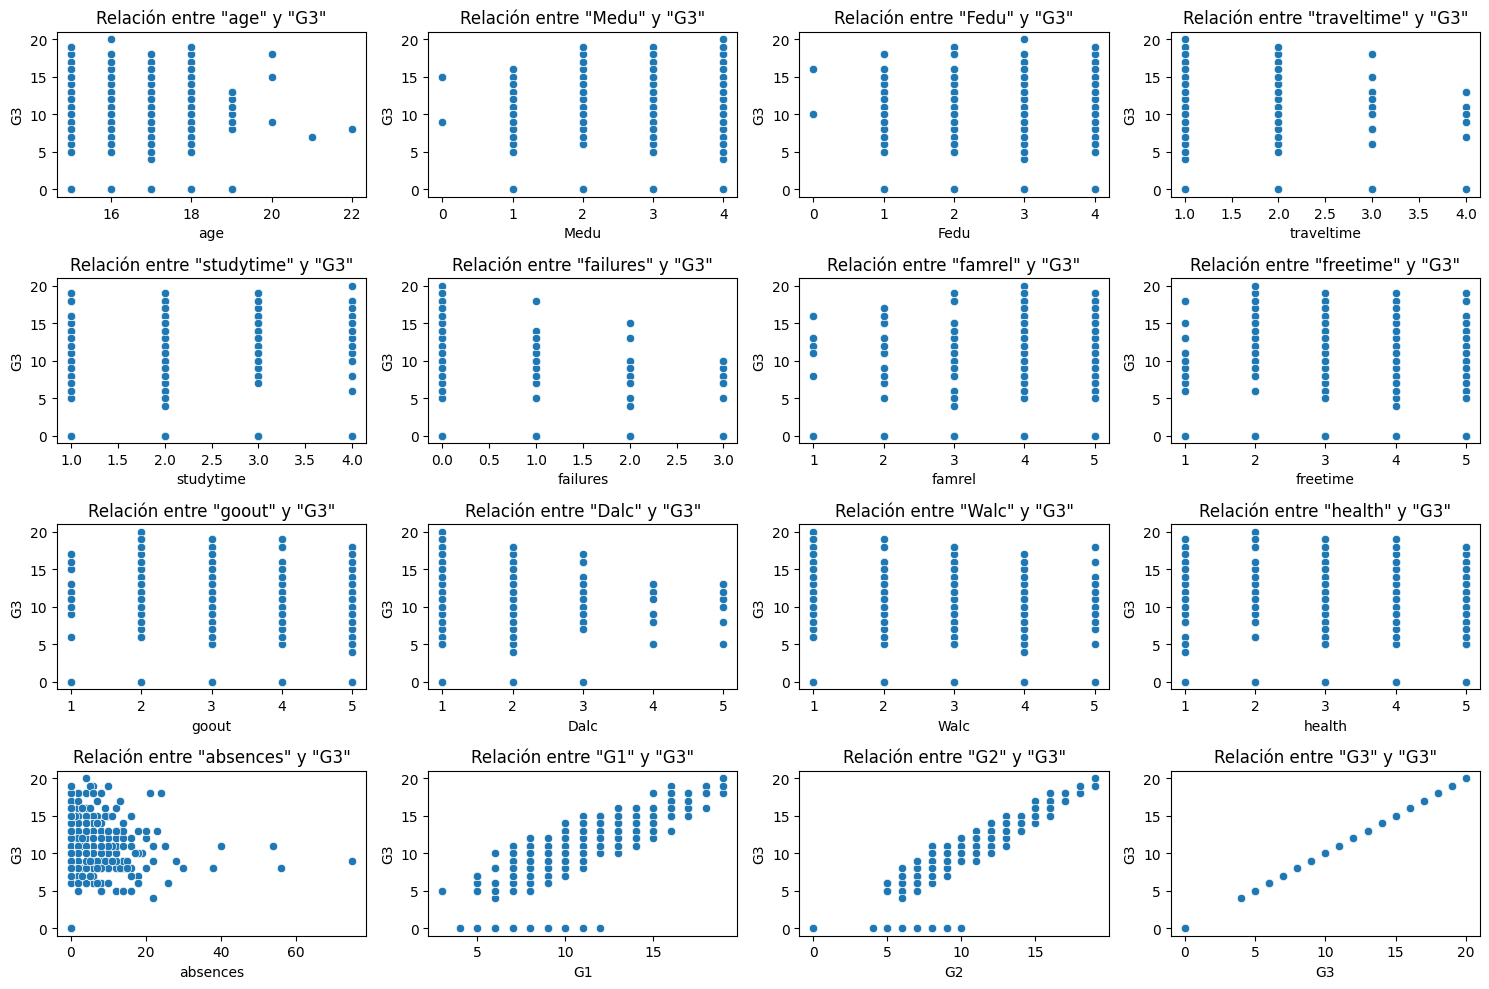

CPU times: user 3.53 s, sys: 183 ms, total: 3.72 s
Wall time: 4.12 s


In [ ]:
%%time

# Lista de variables numéricas
numeric_columns = dataset.select_dtypes(include='float64').columns

# Gráficos de dispersión
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=column, y='G3', data=dataset)
    plt.title(f'Relación entre "{column}" y "G3"')

plt.tight_layout()
plt.show()

### Matriz de correlación para variables numéricas

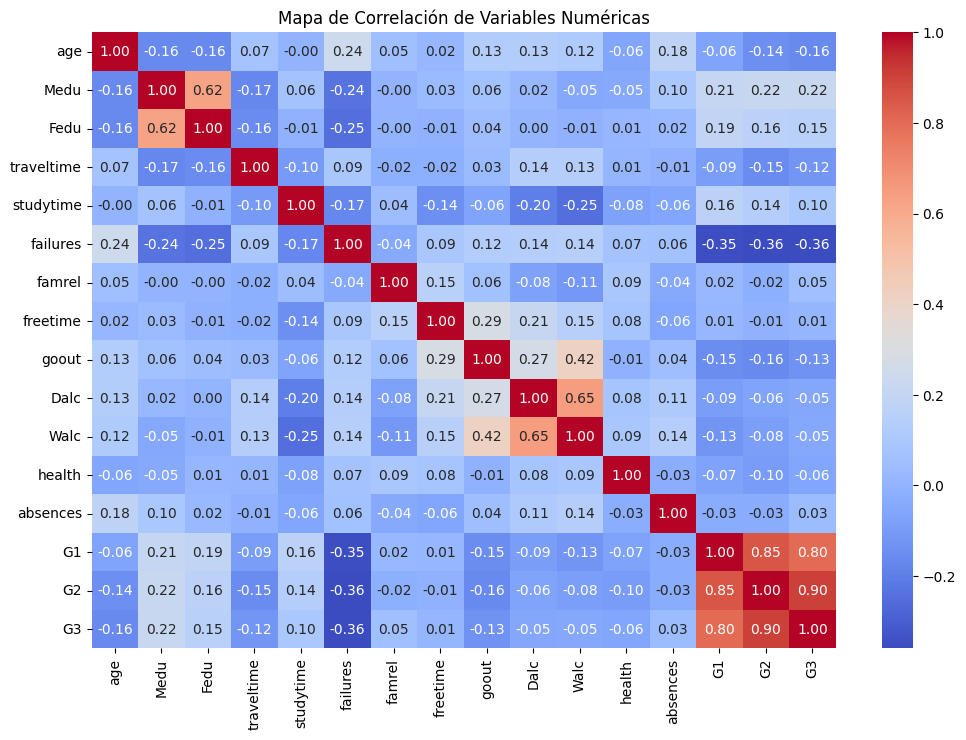

CPU times: user 1.46 s, sys: 38.9 ms, total: 1.5 s
Wall time: 2.27 s


In [ ]:
%%time

# Calcular la matriz de correlación
correlation_matrix = dataset[numeric_columns].corr()

# Visualizar el mapa de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()


## Data processing

## Guardar el nuevo dataset

